<a href="https://colab.research.google.com/github/Pratibh29/CLI-Weather/blob/main/ZTM_ML%2BDS_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tensorflow is used in neural or deep learning to get something out of unstructured data

In [ ]:
# Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds
# We're going to go through the following TensorFlow/Deep Learning workflow:

# Get data ready (download from Kaggle, store, import).
# Prepare the data (preprocessing, the 3 sets, X & y).
# Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
# Evaluating a model (making predictions, comparing them with the ground truth labels).
# Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
# Save, sharing and reloading your model (once you're happy with the results).



In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
# !unzip "drive/MyDrive/dog vision/dog-breed-identification.zip" -d "drive/MyDrive/dog vision/"

In [ ]:
import tensorflow as tf
print('TF version:',tf.__version__)

TF version: 2.13.0


In [ ]:
import tensorflow_hub as hub
print("Hub version:", hub.__version__)
# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else  "not available :(")

Hub version: 0.14.0
GPU available (YESS!!!!)


In [ ]:
# Getting data ready

In [ ]:
import pandas as pd
labels_csv=pd.read_csv('/content/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

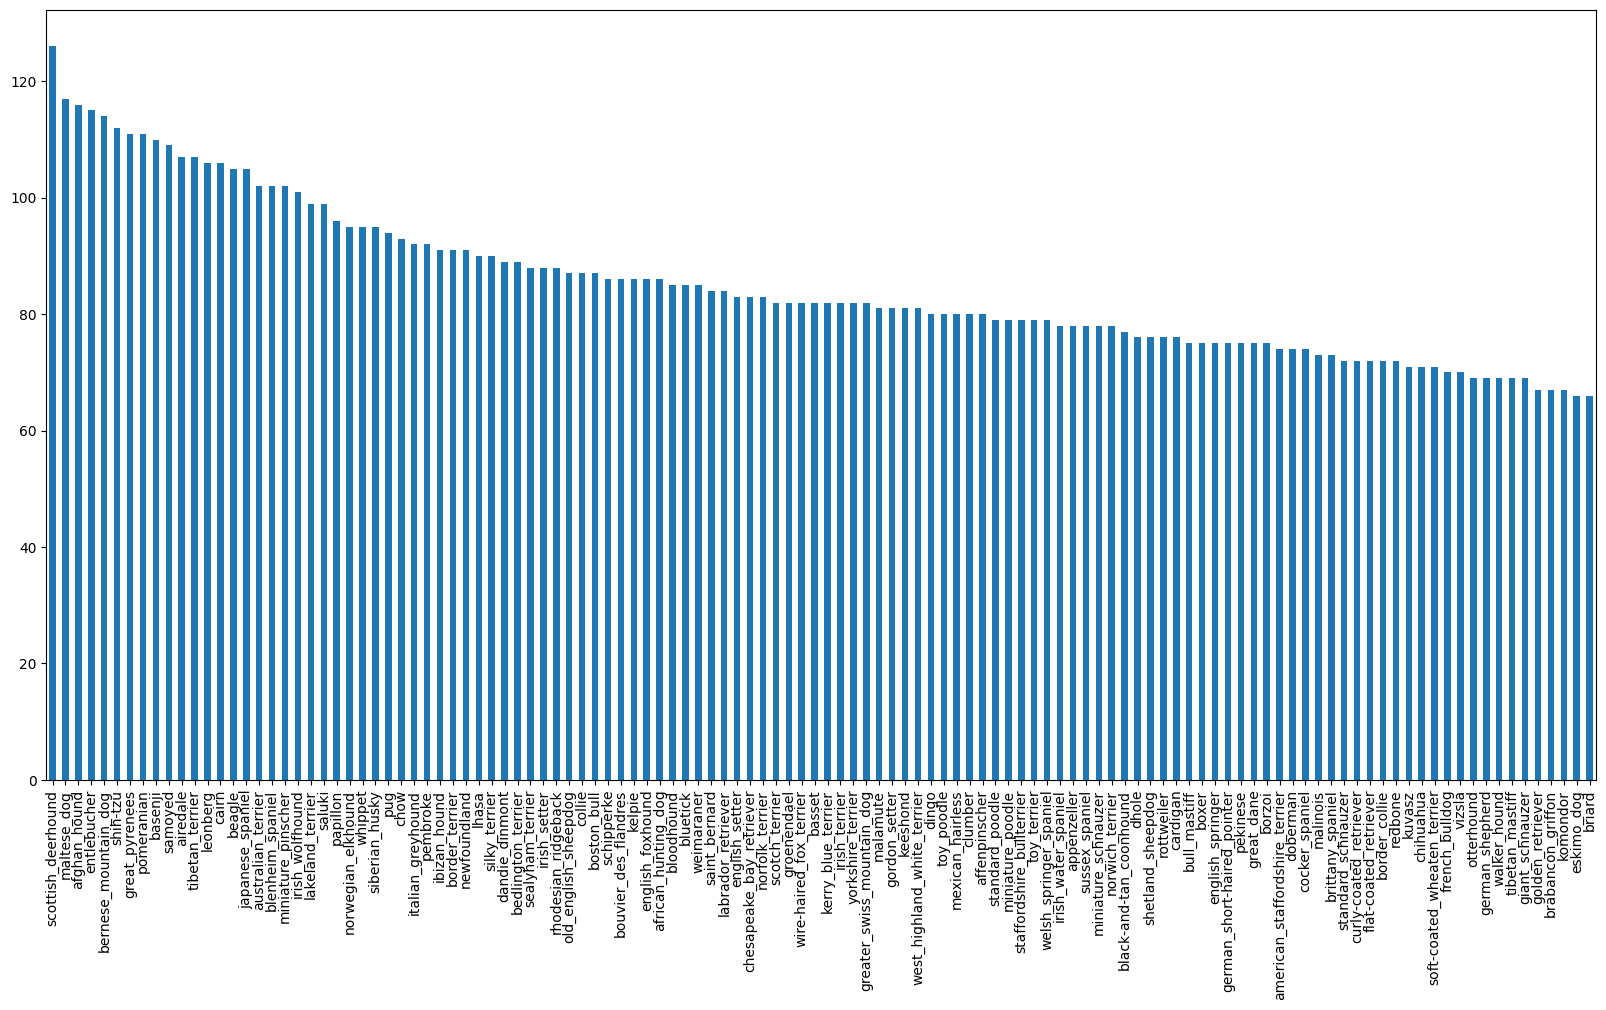

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

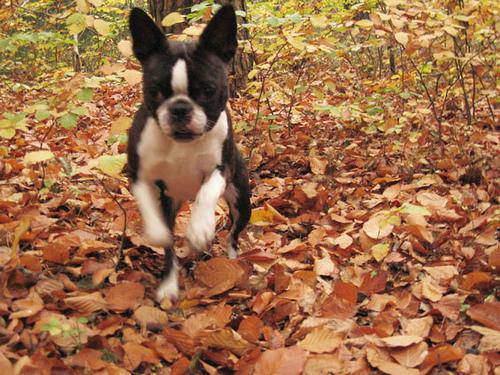

In [ ]:
from IPython.display import Image
Image('/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [ ]:
filenames=['/content/train/'+fname +'.jpg'for fname in labels_csv['id']]
filenames[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir('/content/train/')[:10]

['3f609973f198def3b0ea1f12a3606a43.jpg',
 '16b17dfce7906f0e7a599a538c7ac106.jpg',
 '7224552d70b69007559e6bc19f412769.jpg',
 '418b16343949c0055f6357f4314b99aa.jpg',
 '238f8a750263db92c8665612ef46e216.jpg',
 '16da5fc3f2c4273902da11aafc13456e.jpg',
 '66b1a3eb90d750b8739cbd6e74db13cf.jpg',
 '2ac10837ecb82f466b9a9f60bacfe99f.jpg',
 '5dc913ed57f4ddb46db2d5e579fca853.jpg',
 '18195ce24678ab4e2a3c779d7d5e4fac.jpg']

In [ ]:
# check whether number of filename matches number of actual image file
import os
os.listdir('/content/train/')[:10]
if len(os.listdir('/content/train/'))==len(filenames):
  print(' Filenames match actual amount of files, proceed')
else:
  print('filenames do not match actual amount of files,check the trget directory')

 Filenames match actual amount of files, proceed


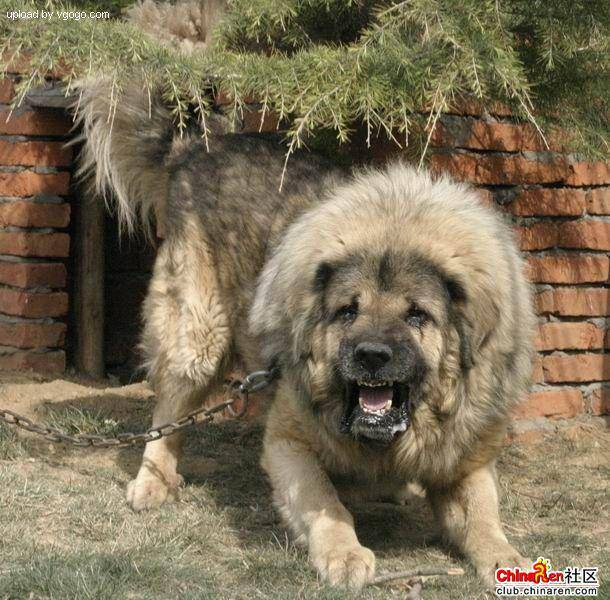

In [ ]:
# more check
Image(filenames[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [ ]:
import numpy as np
labels=labels_csv['breed']
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# missing data check
# check if number of labels matches number of filenames

if len(labels)==len(filenames):
  print('Number of labels matches number of filenames')
else:
  print(' not matches, check file directory')

Number of labels matches number of filenames


In [ ]:
# find unique label values

unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
# turn a single label into array of booleans

print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# example- turning boolean array into integers
# original label
print(labels[0])
# index where label occurs
print(np.where(unique_breeds==labels[0]))
# index where label occurs in boolean array
print(boolean_labels[0].argmax())
# there will be a 1 where the sample label occurs
print(boolean_labels[0].astype(int))


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# creating validation set
# setting x and y
x=filenames
y=boolean_labels


In [ ]:
# experimenting with 1000 images
# set number of images to use for experimenting
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000,step:100}

In [ ]:
# let split our data into train and validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
x_train[:5],y_train[:2]

(['/content/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, F

In [ ]:
# preprocessing images(turning images into Tensors)
# to preproceess we will write a fucntion

# covert imagea to numpoy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [ ]:
# define image size
IMG_SIZE=224

# creating function for preprciessing images
def process_image(image_path,img_size=IMG_SIZE):
  # read in an image file
  image=tf.io.read_file(image_path)

  # turn jpeg image to numerical cTensor with 3
  # colour channels (red,green, blue)
  image=tf.image.decode_jpeg(image,channels=3)

  # convert the colour channel values from 0-255 to 0-1 value
  image=tf.image.convert_image_dtype(image,tf.float32)

  # resixe the image to ourdesired value(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


In [ ]:
# turning out data into batches
# create a function to return tuple(image,label)

def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label



In [ ]:
# demo of above
process_image(x[42],tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [ ]:
# define the batch size, 32 is good
BATCH_SIZE=32

# Create a function to convert data to batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  #  if the data is test dataset, we don't hv lanels
  if test_data:
    print('Creating test data batches')
    data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if data is valid dataset, e don't hv to shuffle it
  elif valid_data:
    print('Creating validation data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Creating trainig data batches')
    # turn filepaths and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    # create(image,label) tuples(this also turns the image path into a preprocessed image)
    data=data.map(get_image_label)

    # turn the training data into batches
    data_batch=data.batch(BATCH_SIZE)

  return data_batch





In [ ]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

Creating trainig data batches
Creating validation data batches


In [ ]:
# check out diff attributes of our data batches

train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# visulasing data batches
import matplotlib.pyplot as plt


#  create a function for viewing images in a data batch

def show_25_images(images,labels):
  # setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25(for displaying 25 images)
  for i in range(25):

    # create subplots
    ax=plt.subplot(5,5,i+1)

    # display image
    plt.imshow(images[i])

    # add image label
    plt.title(unique_breeds[labels[i].argmax()])

    # turn the grid llines off
    plt.axis('off')


In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels


(array([[[[0.22645059, 0.24998   , 0.23429373],
          [0.2377051 , 0.2612345 , 0.24554823],
          [0.26499602, 0.28852543, 0.27283916],
          ...,
          [0.23902576, 0.2805625 , 0.2362647 ],
          [0.22979191, 0.27308932, 0.2279112 ],
          [0.22847146, 0.2708083 , 0.22611049]],
 
         [[0.20034015, 0.22779113, 0.19948982],
          [0.2052021 , 0.23265308, 0.204952  ],
          [0.2234794 , 0.2509304 , 0.22212887],
          ...,
          [0.1902157 , 0.24693862, 0.19649841],
          [0.20959343, 0.2693975 , 0.21851714],
          [0.22784114, 0.28596425, 0.23532403]],
 
         [[0.21257505, 0.24355744, 0.20159066],
          [0.19957985, 0.2304422 , 0.18883555],
          [0.21776712, 0.24884954, 0.20658265],
          ...,
          [0.16987772, 0.23992579, 0.18529391],
          [0.17129883, 0.24178706, 0.18693511],
          [0.14683905, 0.21708715, 0.16235524]],
 
         ...,
 
         [[0.12412988, 0.18687499, 0.1476593 ],
          [0.19531

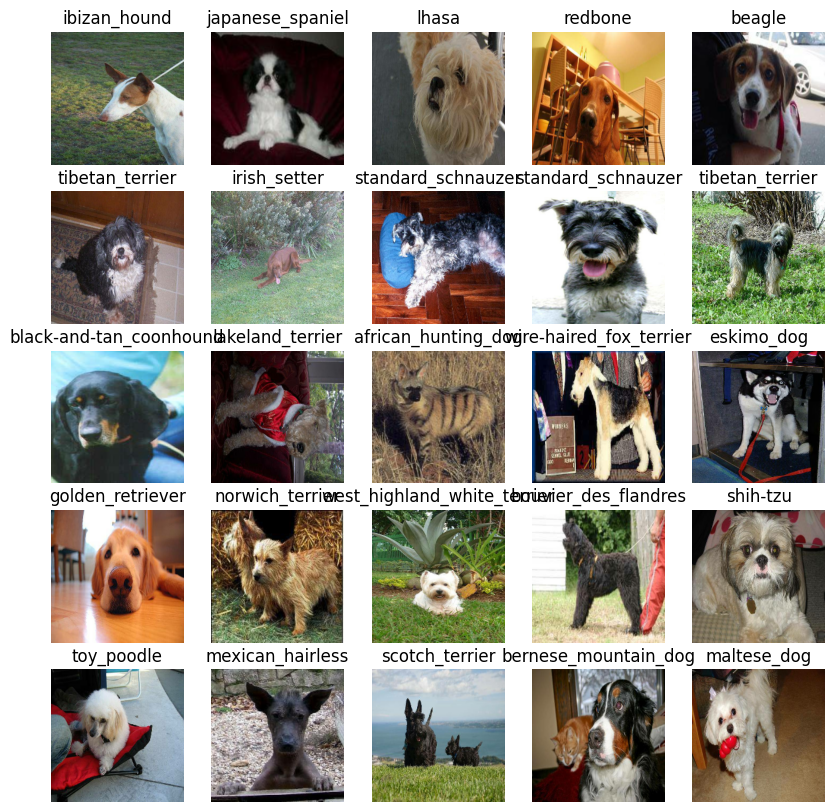

In [ ]:
# lets visulaise the daat in traing batch
show_25_images(train_images,train_labels)

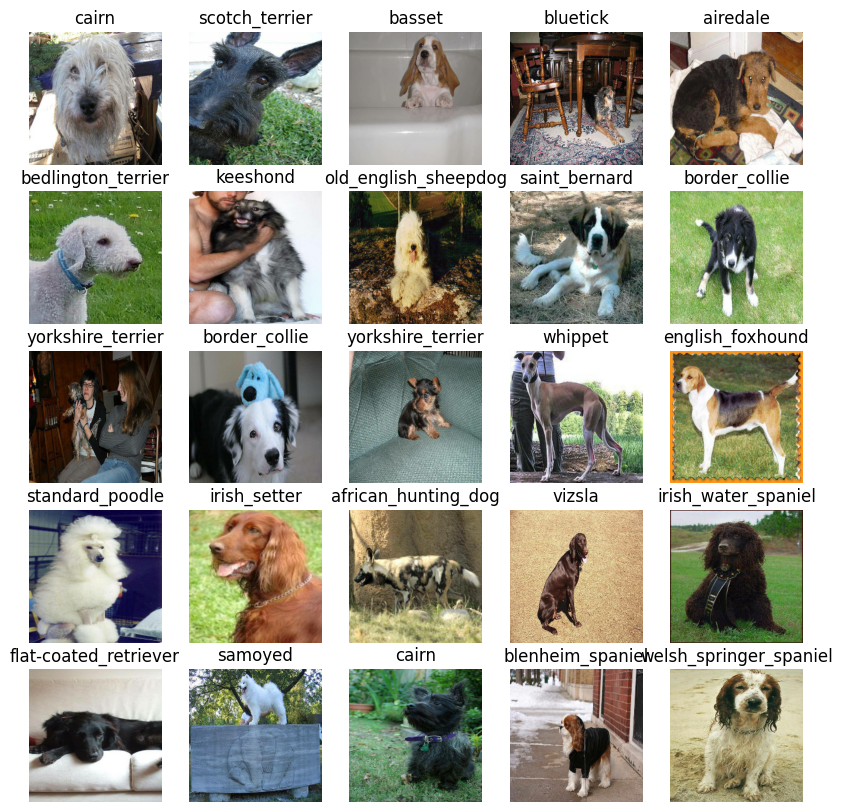

In [ ]:
# lets visulaise the daat in validation batch
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [ ]:
# building a model

# setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

# Setup output shape to the model
OUTPUT_SHAPE=len(unique_breeds)

# Setup model url from Tensorflow hub
MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'


In [ ]:
#  create a function which builds a keras model

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('Building midel with:', MODEL_URL)

  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')])

  # compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model=create_model()
model.summary()

Building midel with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
outputs=np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [ ]:
# creating callbacks
# callbacks are helper functions a model can use during training
# to do such things as save its progress,check its progress or stop
# training early if model stops improving

# load tensorboard notebook extension
%load_ext tensorboard




In [ ]:
import datetime

def create_tensorboard_callback():

  # create a log directory for storing tensorboard logs
  logdir=os.path.join('/content/drive/MyDrive/logs',
                      datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#  create early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)



In [ ]:
# trining model(on subset of data)
# our model first will train only 1000 images

NUM_EPOCHS=100 #@param {type:"slider",min:10,max:100,step:10}


In [ ]:
# create a function that trains a model

def train_model():
  # create a model
  model=create_model()

  # create new Tensorboard session everytime we create a model
  tensorboard=create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])

  return model



In [ ]:
# fit the moddel to data
model=train_model()

Building midel with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 17s 146ms/step - loss: 4.6489 - accuracy: 0.0913 - val_loss: 3.4678 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 3s 100ms/step - loss: 1.6974 - accuracy: 0.6837 - val_loss: 2.2169 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 3s 128ms/step - loss: 0.5907 - accuracy: 0.9325 - val_loss: 1.7128 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 3s 125ms/step - loss: 0.2610 - accuracy: 0.9850 - val_loss: 1.5041 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 2s 71ms/step - loss: 0.1507 - accuracy: 0.9950 - val_loss: 1.4098 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 2s 82ms/step - loss: 0.1026 - accuracy: 1.0000 - val_loss: 1.3608 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================]

In [ ]:
# checking the Tensorboard logs
%tensorboard --logdir /content/drive/MyDrive/logs

<IPython.core.display.Javascript object>

In [ ]:
# making and evaluating predictions using a trained model

# make predictions on validation daat(not used to train on)
predictions=model.predict(val_data,verbose=1)
predictions


7/7 [==============================] - 2s 106ms/step


array([[1.3517443e-03, 4.1987735e-04, 6.4479781e-04, ..., 3.1235788e-04,
        2.0902040e-05, 2.8765481e-03],
       [1.8446124e-03, 1.7778155e-03, 1.4251968e-02, ..., 1.0050230e-03,
        7.8170141e-03, 1.8990005e-04],
       [4.9347251e-05, 1.0875188e-04, 6.1335682e-05, ..., 2.2946295e-04,
        9.6624964e-05, 6.6541554e-04],
       ...,
       [1.7593457e-06, 5.1819756e-05, 1.7952820e-05, ..., 4.3955524e-06,
        8.7498367e-05, 1.2261275e-04],
       [3.7906868e-03, 5.4286473e-04, 1.3469844e-03, ..., 4.8408340e-04,
        1.1077382e-04, 8.2905637e-03],
       [4.4902015e-04, 5.9493563e-05, 1.1797085e-03, ..., 5.9950864e-03,
        2.9686547e-03, 3.3887292e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
predictions[0]

array([1.3517443e-03, 4.1987735e-04, 6.4479781e-04, 5.0261984e-05,
       9.3578936e-05, 1.1084460e-04, 1.3321767e-02, 3.9382407e-04,
       1.1568329e-03, 1.3674396e-03, 7.8959117e-04, 2.1860615e-05,
       5.6498458e-05, 3.1182168e-05, 3.4693407e-04, 6.5239135e-04,
       2.2184189e-05, 3.6929622e-01, 1.6239281e-05, 2.5149790e-04,
       8.7301811e-04, 3.5272380e-05, 1.8333008e-05, 6.3857605e-04,
       3.4562618e-05, 7.6868382e-05, 1.9140418e-01, 2.4132863e-04,
       2.5210448e-04, 1.7419779e-04, 3.2970787e-05, 1.5493820e-04,
       3.4143991e-04, 7.6988599e-06, 3.7550330e-05, 4.5468765e-03,
       1.9365823e-05, 5.2606283e-05, 1.1209710e-04, 6.4316111e-05,
       3.7430576e-04, 6.8326481e-06, 1.7231511e-04, 4.2766529e-05,
       3.2824057e-05, 2.7164779e-04, 1.1206086e-04, 1.1773134e-04,
       1.4158242e-04, 2.7958074e-04, 2.2757602e-04, 2.7886068e-05,
       2.1617647e-04, 9.0641966e-05, 3.1801334e-05, 3.6125508e-05,
       4.3397211e-04, 2.0622672e-03, 2.4327291e-03, 9.9823587e

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
index=0
print(predictions[0])
print(f'Max value (probability of production):{np.max(predictions[index])}')
print(f'sum:{np.sum(predictions[index])}')
print(f'Max index:{np.argmax(predictions[index])}')
print(f'Predicted label:{unique_breeds[np.argmax(predictions[index])]}')

[1.3517443e-03 4.1987735e-04 6.4479781e-04 5.0261984e-05 9.3578936e-05
 1.1084460e-04 1.3321767e-02 3.9382407e-04 1.1568329e-03 1.3674396e-03
 7.8959117e-04 2.1860615e-05 5.6498458e-05 3.1182168e-05 3.4693407e-04
 6.5239135e-04 2.2184189e-05 3.6929622e-01 1.6239281e-05 2.5149790e-04
 8.7301811e-04 3.5272380e-05 1.8333008e-05 6.3857605e-04 3.4562618e-05
 7.6868382e-05 1.9140418e-01 2.4132863e-04 2.5210448e-04 1.7419779e-04
 3.2970787e-05 1.5493820e-04 3.4143991e-04 7.6988599e-06 3.7550330e-05
 4.5468765e-03 1.9365823e-05 5.2606283e-05 1.1209710e-04 6.4316111e-05
 3.7430576e-04 6.8326481e-06 1.7231511e-04 4.2766529e-05 3.2824057e-05
 2.7164779e-04 1.1206086e-04 1.1773134e-04 1.4158242e-04 2.7958074e-04
 2.2757602e-04 2.7886068e-05 2.1617647e-04 9.0641966e-05 3.1801334e-05
 3.6125508e-05 4.3397211e-04 2.0622672e-03 2.4327291e-03 9.9823587e-02
 3.8540602e-04 5.9295035e-05 3.4590924e-04 5.6805929e-05 1.7227665e-04
 3.1535730e-03 2.7026774e-04 7.5580225e-05 2.5531033e-03 4.5105455e-05
 5.007

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
#visualising the predictions

def plot_pred(prediction_probabilities,labels, images,n=1):
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]

  # get the pred label
  pred_label=get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)
  # plt.title('{} {:2.0f}% {}'.format(pred_label,np.max(pred_prob)*100,true_label))



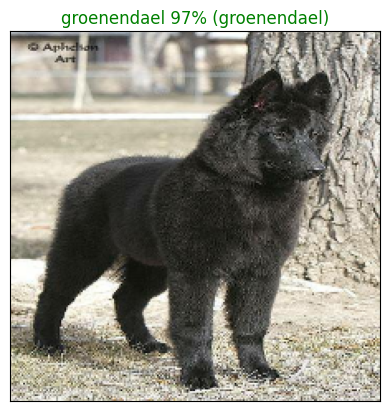

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,n=45)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

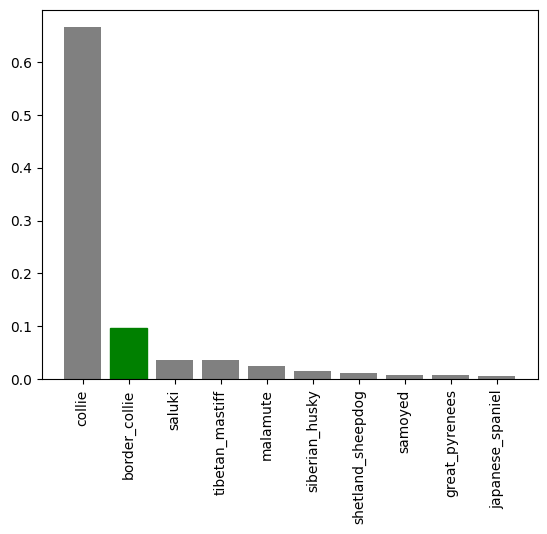

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

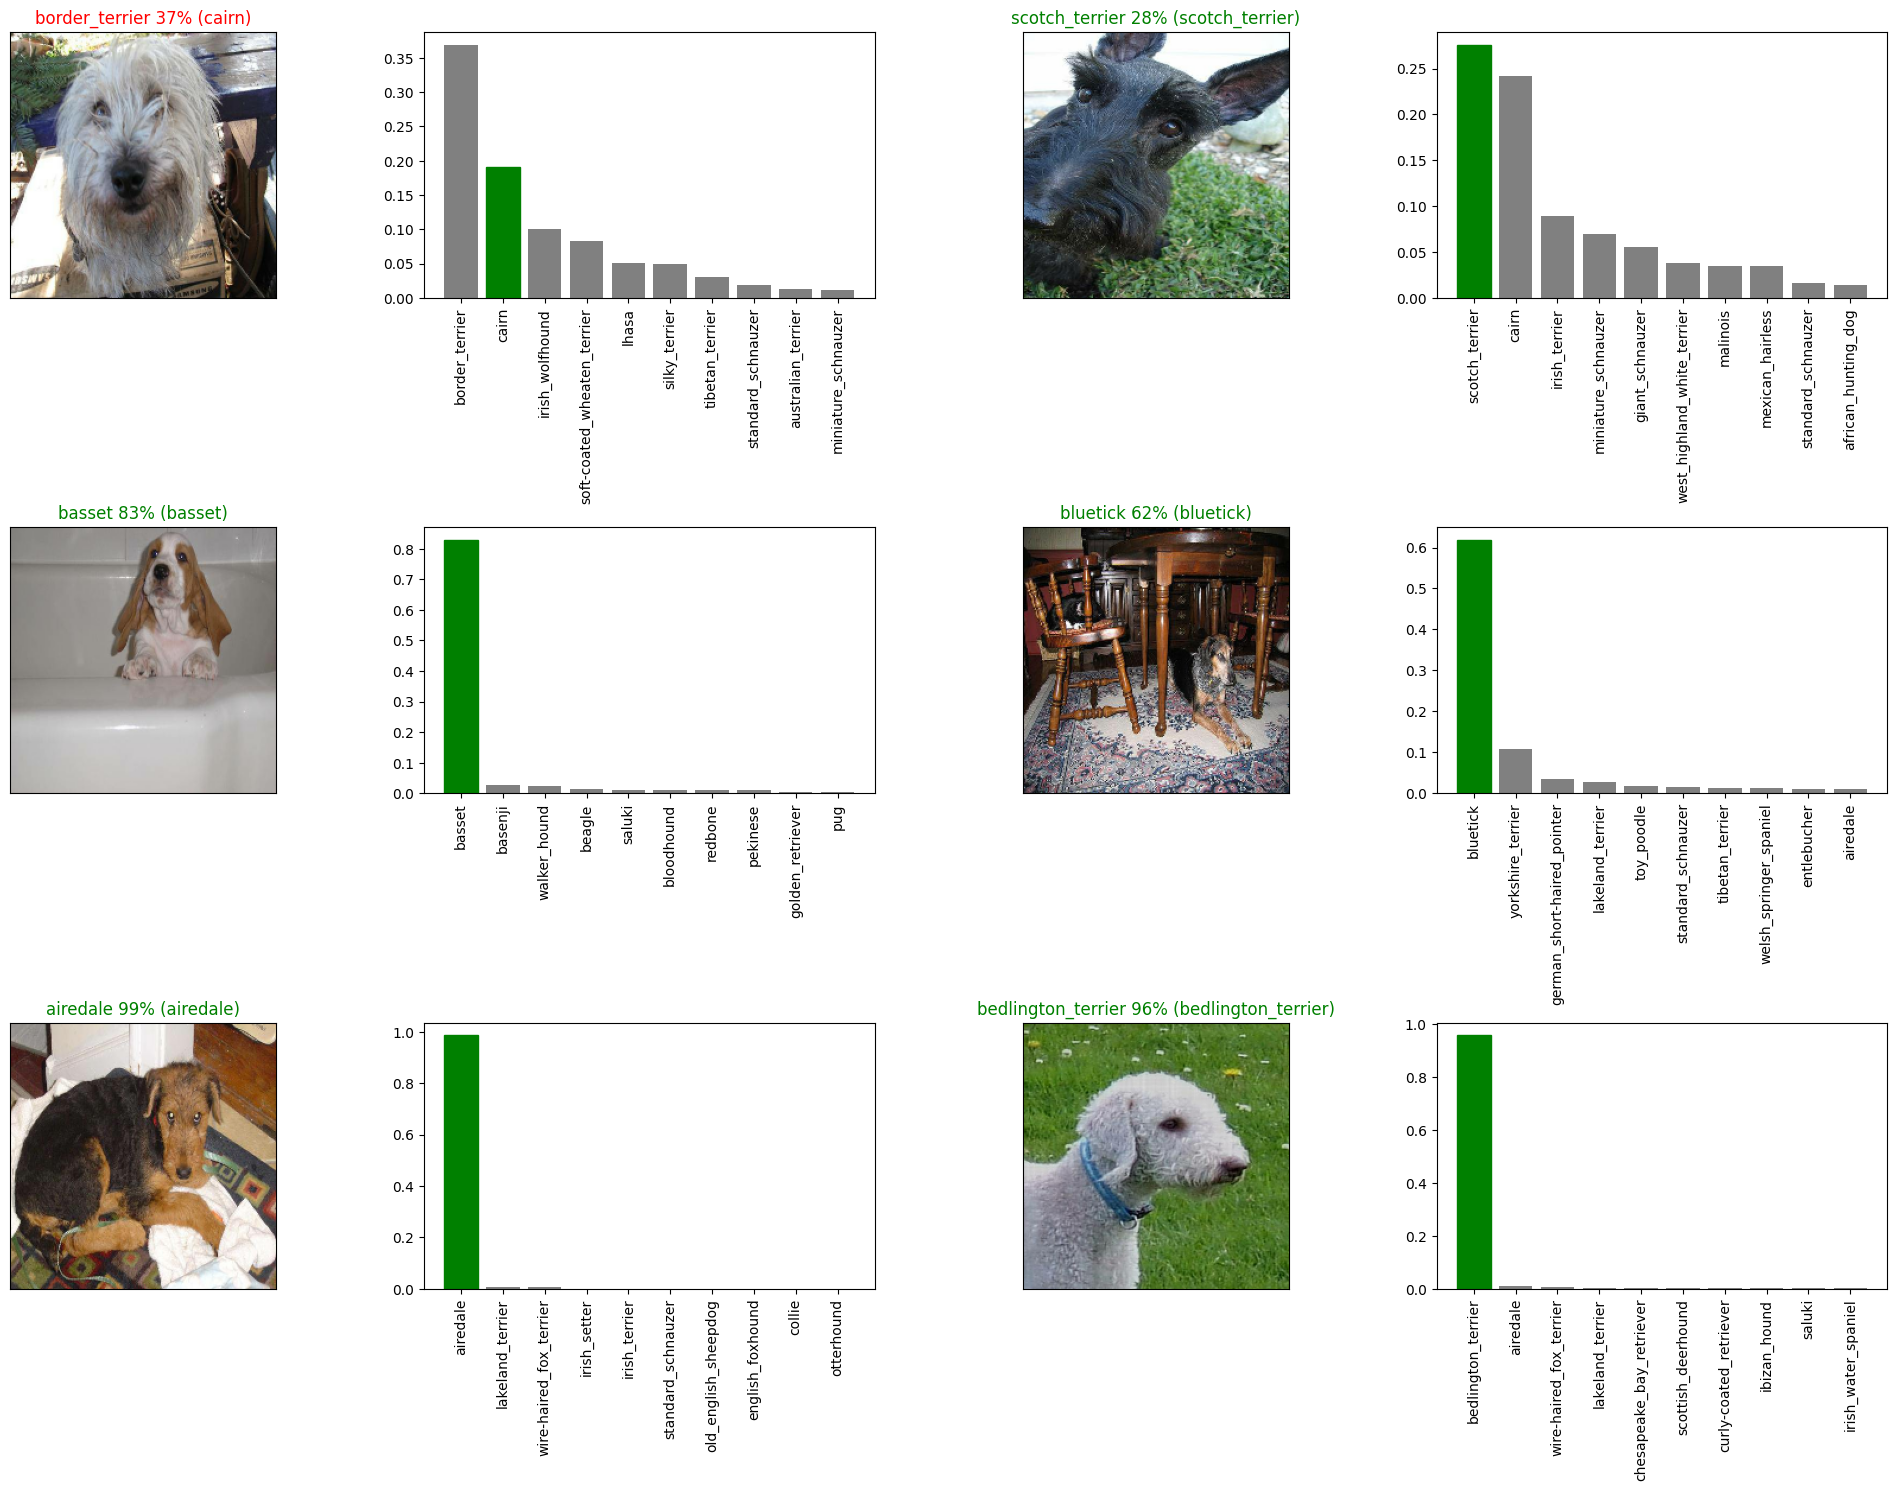

In [ ]:
# Let's check a few predictions and their different values
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,labels=val_labels,
            images=val_images,n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Saving and reloading a model

def save_model(model,suffix=None):

  # create a model dictionary pathname with current time
  modeldir=os.path.join('/content/drive/MyDrive/models',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  model_path=modeldir+'_'+suffix+'.h5'
  print(f'Saing model to:{model_path}...')
  model.save(model_path)
  return model_path



In [ ]:
# creating function to load a trained model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,suffix='1000-images-mobilenetV2 Adam')


Saing model to:/content/drive/MyDrive/models/20230915-06431694760232_1000-images-mobilenetV2 Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/models/20230915-06431694760232_1000-images-mobilenetV2 Adam.h5'

In [ ]:
# load 1000 image modell
load_model('/content/drive/MyDrive/models/20230906-07101693984228_1000-images-mobilenetV2 Adam.h5')


Loading saved model from: /content/drive/MyDrive/models/20230906-07101693984228_1000-images-mobilenetV2 Adam.h5


In [ ]:
# training dog model on full data
# create a data batch with the full data

full_data=create_data_batches(x,y)




Creating trainig data batches


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a model for full model
full_model=create_model()

Building midel with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# create full model callbacks
full_model_tensorboard=create_tensorboard_callback()

full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)


In [ ]:
# fit the model to full data
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])


Epoch 1/100
320/320 [==============================] - 27s 69ms/step - loss: 1.3451 - accuracy: 0.6685
Epoch 2/100
320/320 [==============================] - 20s 63ms/step - loss: 0.3993 - accuracy: 0.8810
Epoch 3/100
320/320 [==============================] - 23s 70ms/step - loss: 0.2367 - accuracy: 0.9343
Epoch 4/100
320/320 [==============================] - 21s 66ms/step - loss: 0.1562 - accuracy: 0.9615
Epoch 5/100
320/320 [==============================] - 20s 62ms/step - loss: 0.1060 - accuracy: 0.9785
Epoch 6/100
320/320 [==============================] - 23s 71ms/step - loss: 0.0773 - accuracy: 0.9858
Epoch 7/100
320/320 [==============================] - 22s 67ms/step - loss: 0.0584 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 22s 69ms/step - loss: 0.0461 - accuracy: 0.9946
Epoch 9/100
320/320 [==============================] - 21s 64ms/step - loss: 0.0374 - accuracy: 0.9969
Epoch 10/100
320/320 [==============================] - 19s 60ms/step - l

In [ ]:
save_model(full_model,suffix='full-images-set-mobilenetV2 Adam')


Saing model to:/content/drive/MyDrive/models/20230915-06511694760701_full-images-set-mobilenetV2 Adam.h5...


'/content/drive/MyDrive/models/20230915-06511694760701_full-images-set-mobilenetV2 Adam.h5'

In [ ]:
loaded_full_model=load_model('/content/drive/MyDrive/models/20230906-07421693986144_full-images-set-mobilenetV2 Adam.h5')

Loading saved model from: /content/drive/MyDrive/models/20230906-07421693986144_full-images-set-mobilenetV2 Adam.h5


In [ ]:
# Making predictions on the test dataset
# Load test image filenames (since we're using os.listdir(), these already have .jpg)

test_path='/content/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]


['/content/test/0568885d3278881be3fa98b4b7e85efb.jpg',
 '/content/test/7d58823cd3a11a72c7d2d6e9001f90b7.jpg',
 '/content/test/9f60627d6b86a828f6c3c9da9dfbf4cb.jpg',
 '/content/test/dafc9901d935400355c4a1266c3fed73.jpg',
 '/content/test/93b4c41ff7a27648da84981eb680c6e4.jpg',
 '/content/test/585eb4ebf4b4369a9d252964ba51408b.jpg',
 '/content/test/dd539ec1933bc47bc80b1447a26aef45.jpg',
 '/content/test/f00272c001d09c7c306bb224da47f17a.jpg',
 '/content/test/ca8bf19cb287abbbf9cd8e1d8ea41355.jpg',
 '/content/test/8dacb6973b785dbc667f4a39c2ff8af7.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# create test data batch
test_data=create_data_batches(test_filenames,test_data=True)


Creating test data batches


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# making predictions
test_predictions=loaded_full_model.predict(test_data,verbose=1)


324/324 [==============================] - 24s 72ms/step


In [ ]:
# Preparing test dataset predictions for Kaggle
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "/content/test"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  0568885d3278881be3fa98b4b7e85efb           NaN          NaN   
1  7d58823cd3a11a72c7d2d6e9001f90b7           NaN          NaN   
2  9f60627d6b86a828f6c3c9da9dfbf4cb           NaN          NaN   
3  dafc9901d935400355c4a1266c3fed73           NaN          NaN   
4  93b4c41ff7a27648da84981eb680c6e4           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  0568885d3278881be3fa98b4b7e85efb   2.728487e-09  8.791651e-09   
1  7d58823cd3a11a72c7d2d6e9001f90b7   5.997480e-11  3.021855e-11   
2  9f60627d6b86a828f6c3c9da9dfbf4cb   2.507041e-11  3.763215e-10   
3  dafc9901d935400355c4a1266c3fed73   5.483317e-08  6.371536e-06   
4  93b4c41ff7a27648da84981eb680c6e4   1.372323e-08  1.845904e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.150826e-08  1.543644e-06                    1.378535e-05   
1         9.150313e-12  2.436176e-12                    1.408513e-11   
2         6.843735e-11  1.943336e-10                    2.368533e-10   
3         1.276220e-09  1.147915e-08                    1.856312e-08   
4         4.016074e-10  5.480618e-14                    7.818562e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  3.785798e-02        4.544387e-08  3.719298e-04  3.044714e-08  ...   
1  3.514696e-09        7.279861e-13  5.257189e-12  3.748118e-12  ...   
2  9.230119e-09        1.237221e-11  9.818764e-12  1.276505e-09  ...   
3  2.123735e-08        6.327461e-11  3.858728e-10  9.095926e-09  ...   
4  1.845835e-11        1.587891e-13  3.443166e-10  8.055853e-11  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.508806e-08  7.631455e-10  6.592739e-08  1.286680e-05  2.028244e-08   
1  5.925731e-11  2.494897e-14  2.719573e-10  7.153744e-11  3.847767e-09   
2  1.909182e-11  1.443650e-10  5.889078e-11  8.786530e-10  4.185745e-10   
3  1.072459e-08  1.996528e-10  1.801969e-10  2.590762e-09  7.490061e-08   
4  3.450583e-09  3.398663e-12  2.853625e-10  3.156052e-08  6.477144e-08   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.474328e-07                 1.067035e-08  1.889344e-05   
1            1.114178e-13                 1.547172e-13  8.153213e-09   
2            4.206197e-08                 9.121545e-12  2.509496e-10   
3            2.273949e-09                 8.749627e-11  1.072054e-09   
4            1.519495e-12                 5.071422e-10  1.810785e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.826823e-09       8.300157e-10  
1             9.156100e-14       7.422737e-09  
2             1.076703e-11       1.765839e-11  
3             2.379381e-09       2.242332e-08  
4             1.535483e-13       3.595528e-12  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/dog vision/full_model_prediction.csv",
                 index=False)

In [ ]:
# Making predictions on custom images
